## About the model
The Weather Research and Forecasting Model (WRF) is a modern numerical weather model that is used for operational weather forecasts and research. Development of the weather model began in late 1990's. Now, the model is on its fourth version, has nearly 50,000 users, and it used for research all around the globe. 

The weather model consists of many components that contribute to weather forecasts. There are modules and functions that are used to calculate incoming radiation from the sun, the transfer of heat from the land and ocean surfaces, the movement of air (wind), moisture and precipitation, and even chemical components of the atmosphere. 



## The forecast process
The forecast process begins with observations of our environment. These observations consist of satellite data, weather balloons, weather stations, instruments mounted on aircraft and boats, as well as other sources. A software package ingests all this data from around the globe and synchronize it. The goal is to create an instantaneous "snapshot" of the atmosphere. The data is then converted into a format that is usable (and physically consistent) with a weather model. This process is known as data assimilation. Once the data is assimilated, a file is created. This file is called an initial condition, and it represents the current state of the atmosphere. 

When it is time to run the model, a user selects a domain. The domain can be as small as a single county or consist of the entire globe. After the domain is selected, a user will run the preprocessing script, which creates the domain and aligns it with the initial condition. If the domain is small the preprocessing system will establish rules and properties to handle the edges of the domain, since there is no information as to what whether comes "into" the domain. 

Once preprocessing is completing the WRF model can then start. When the model begins running it decomposes the domain into a 3-D grid. It calculates the temperature, wind, rain, and many other atmospheric parameters in the grid and for many layers vertically. Once the model completes computations for all grid cells, it then moves to the next time step. This process repeats until the simulation time has concluded. After the simulation has completed, an output file is created, and a user can analyze the data and make a forecast.


## The Math (that we will not cover) 
The following equations are condensed and abbreviated forms of the non-rotating governing equations for the atmosphere and oceans. Collectively, this system of differential equations can explain the dynamics and movement of the atmosphere and ocean. Broadly, these equations describe fluid motion (the atmosphere behaves just like a fluid).

These equations are embedded within weather models, and they are computationally expensive. This means that many rigorous calculations are needed to solve these equations, since no practical analytical solution exists for these equations.


\begin{align*}
\frac{Du}{Dx}&+\frac{Dv}{Dy}+\frac{Dw}{Dz} = 0 &\qquad \text{Continuity Equation}\\
\frac{Du}{Dt}  &= \frac{1}{\rho}\frac{\partial p}{\partial x} + 
                  \nu\frac{\partial^2 u}{\partial^2 x} 
                  &\qquad \text{Momentum Equation X-Direction} \\
\frac{Dv}{Dt}  &= \frac{1}{\rho}\frac{\partial p}{\partial y} +
                  \nu\frac{\partial^2 v}{\partial^2 y}
                  &\qquad \text{Momentum Equation Y-Direction}\\
\frac{Dw}{Dt}  &= \nabla \Phi + \frac{1}{\rho}\frac{\partial p}{\partial z} + v\nabla^2v +
                  \nu\frac{\partial^2 w}{\partial^ z}
                  &\qquad \text{Momentum Equation Z-Direction}\\
\frac{D\theta}{Dt} &= \frac{\theta}{T}\frac{\dot{Q}}{c_p}
                      &\qquad \text{Thermodynamic/Energy Equation}\\
p &= \rho R T &\qquad \text{Equation of State}\\
\end{align*}


## Libraries Used for Visualization
- Matplotlib
- Basemap
- netCDF4
- wrf-py

In [ ]:
#Condensed Version for running WPS
# if you haven't already done so -- cp -r /scratch/07498/wefoust/SGCI_2020_Shared $WORK

#Step 1
#cd $WORK/SGCI_2020_Shared/Build_WRF/WPS


#Step 2 (Can edit namelist before ruinning to get custom simulation)
# ./geogrid.exe

#Step 3)
# ./link_grib.csh ../DATA/

#Step 4)
# ln -sf ungrib/Variable_Tables/Vtable.GFS Vtable

#Step 5)
# ./ungrib.exe

#Step 6)
# ./metgrid.exe

In [ ]:
#Condensed version for running WRF

#Step 1)
# cd $WORK/SGCI_2020_Shared/Build_WRF/WRF/run

#Step 2)
# ln -sf ../../WPS/met_em* .

#Step 3)
# mpirun -np 1 ./real.exe

#Step 4)
# mpirun -np 32 ./wrf.exe

#Step 5) 
# copy output file Jupyter Notebook directory

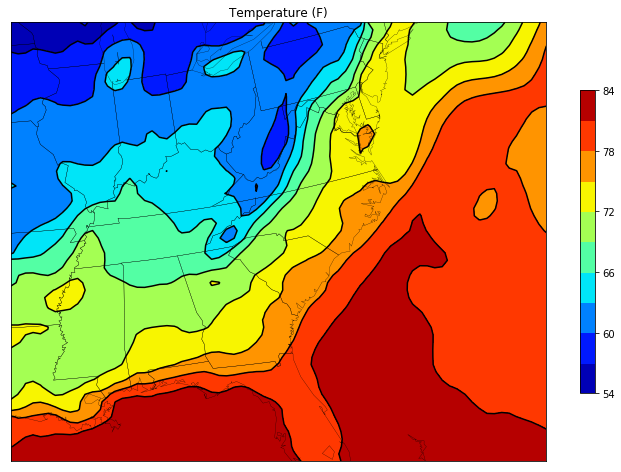

In [15]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

# Open the NetCDF file
ncfile = Dataset("wrf_test.nc")

# Get the sea level pressure
slp = getvar(ncfile, "T2")

# Smooth the sea level pressure since it tends to be noisy in some areas
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the basemap object
m = get_basemap(slp)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
m.drawcoastlines(linewidth=0.25)
m.drawstates(linewidth=0.25)
m.drawcountries(linewidth=0.25)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = m(to_np(lons), to_np(lats))

# Draw the contours and filled contours
m.contour(x, y, (to_np(smooth_slp)-273)*(9/5)+32, 10, colors="black")
m.contourf(x, y, (to_np(smooth_slp)-273)*(9/5)+32, 10, cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(shrink=.62)

plt.title("Temperature (F)")

plt.show()

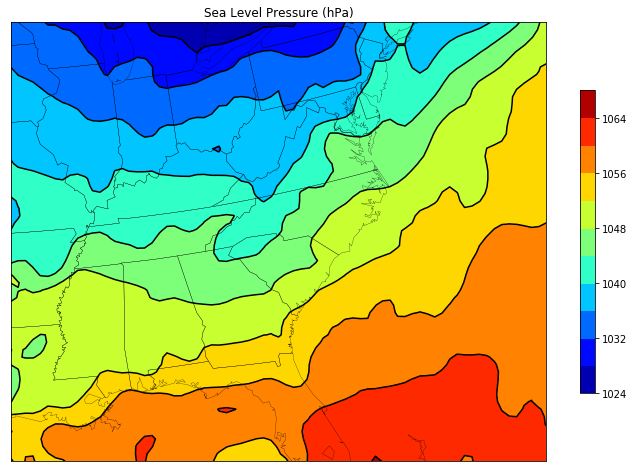

In [10]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

# Open the NetCDF file
ncfile = Dataset("wrf_test.nc")

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy in some areas
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the basemap object
m = get_basemap(slp)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
m.drawcoastlines(linewidth=0.25)
m.drawstates(linewidth=0.25)
m.drawcountries(linewidth=0.25)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = m(to_np(lons), to_np(lats))

# Draw the contours and filled contours
m.contour(x, y, to_np(smooth_slp), 10, colors="black")
m.contourf(x, y, to_np(smooth_slp), 10, cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(shrink=.62)

plt.title("Sea Level Pressure (hPa)")
plt.show()